In [ ]:
## Topic Modeling
# Topic은 주제를 말합니다.
# 토픽 모델링은 기계 학습 및 자연어 처리분야에서 토픽은 문서 집합의 추상적인 주제를 발견하기 위해서 사용하는 
# 통계적 모델 중 하나로, 본문에 숨겨진 의미 구조를 발견하기 위해 사용되어지는 텍스트 마이닝 기법.

# 1) 잠재 의미 분석 (Latent Semantic Anaylysis, LSA)
# BoW에 기반한 DTM이나 TF-IDF는 기본적으로 단어의 빈도수를 이용한 수치화 방법이기 때문에 
# 단어의 의미를 고려하지 못한다는 단점이 있었습니다. (이를 토픽 모델링 관점에서는 단어의 토픽을 고려하지 못한다고도 합니다.)
# 이를 위한 대안으로 DTM의 잠재된(Latent) 의미를 이끌어내는 방법으로
# 잠재 의미 분석 (Latent Semantic Analysis, LSA)이라는 방법이 있습니다.
# 잠재 의미 분석 (Latent Semantic Indexing, LSI)라고 부르기도 합니다. 이하 LSA라고 명명하겠습니다.

# 이 방법을 이해하기 위해서는 선형대수학의 특이값 분해(Singular Value Decomposition, SVD)를 이해할 필요가 있습니다.
# 이하 이를 SVD라고 명명 하겠습니다. 이 실습에서는 SVD를 수행하는 구체적인 선형대수학에 대해서는 설명하지 않고,
# SVD가 갖고 있는 의믜를 이해하는 것에 초점을 맞춥니다.

# 1. 특이값 분해 (Singular Value Decomposition, SVD) :https://wikidocs.net/24949

In [16]:
import numpy as np

A = np.array([[0,0,0,1,0,1,1,0,0],[0,0,0,1,1,0,1,0,0],[0,1,1,0,2,0,0,0,0],[1,0,0,0,0,0,0,1,1]])
print("DTM의 크기", np.shape(A))

#Full SVD
U,s,VT=np.linalg.svd(A,full_matrices=True)
print('행렬 U: ')
print(U.round(2))
print('행렬 크기 : ',np.shape(U))

DTM의 크기 (4, 9)
행렬 U: 
[[-0.24  0.75  0.   -0.62]
 [-0.51  0.44 -0.    0.74]
 [-0.83 -0.49 -0.   -0.27]
 [-0.   -0.    1.    0.  ]]
행렬 크기 :  (4, 4)


In [6]:
print('특이값 벡터 : ')
print(s.round(2))
print('크기 : ',np.shape(s))

특이값 벡터 : 
[2.69 2.05 1.73 0.77]
크기 :  (4,)


In [8]:
## Numpy의 linalg.svd()는 특이값 분해의 결과로 대각 행렬이 아니라 특이값의 리스트를 반환한다.
# 그러므로 앞서 본 수식의 형식으로 보려면 이를 다시 대각 행렬로 바꿔주어야 합니다. 우선 특이값을 s에 저장하고 
# 대각행렬 크기의 행렬을 생성한 다음에 그 행렬에 특이 값을 삽입하도록 하겠습니다.

# 대각 행렬 크기인 4x9의 임의의 행렬 생성
S=np.zeros((4,9))
S[:4,:4]=np.diag(s)
print('대각행렬 : ')
print(S.round(2))


대각행렬 : 
[[2.69 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   2.05 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.73 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.77 0.   0.   0.   0.   0.  ]]


In [9]:
print("직교행렬(v의 전치행렬) : ")
print(VT.round(2))

직교행렬 : 
[[-0.   -0.31 -0.31 -0.28 -0.8  -0.09 -0.28 -0.   -0.  ]
 [ 0.   -0.24 -0.24  0.58 -0.26  0.37  0.58 -0.   -0.  ]
 [ 0.58 -0.    0.    0.   -0.    0.   -0.    0.58  0.58]
 [ 0.   -0.35 -0.35  0.16  0.25 -0.8   0.16 -0.   -0.  ]
 [-0.   -0.78 -0.01 -0.2   0.4   0.4  -0.2   0.    0.  ]
 [-0.29  0.31 -0.78 -0.24  0.23  0.23  0.01  0.14  0.14]
 [-0.29 -0.1   0.26 -0.59 -0.08 -0.08  0.66  0.14  0.14]
 [-0.5  -0.06  0.15  0.24 -0.05 -0.05 -0.19  0.75 -0.25]
 [-0.5  -0.06  0.15  0.24 -0.05 -0.05 -0.19 -0.25  0.75]]


In [10]:
# UxSxVT가 A와 일치하는지 확인
# numpy의 allclose()는 2개의 행렬이 동일하면 True 반환
np.allclose(A,np.dot(np.dot(U,S),VT).round(2))

True

In [21]:
# 절단된 SVD(Truncated SVD)
# 특이값 상위 2개 보존
S=S[:2,:2]
print('대각 행렬 s: ')
print(S.round(2))


대각 행렬 s: 
[[2.69 0.  ]
 [0.   2.05]]


In [20]:
# 직교 행렬 U에서도 2개만 남기고 제거
U=U[:,:2]
print(U.round(2))

[[-0.24  0.75]
 [-0.51  0.44]
 [-0.83 -0.49]
 [-0.   -0.  ]]


In [22]:
# 전치 행렬인 VT도 2개의 행만 남기고 제거
VT=VT[:2,:]
print(VT.round(2))

[[-0.   -0.31 -0.31 -0.28 -0.8  -0.09 -0.28 -0.   -0.  ]
 [ 0.   -0.24 -0.24  0.58 -0.26  0.37  0.58 -0.   -0.  ]]


In [24]:
# 축소된 행렬 UxSxVT하면 기존 A와는 다른 결과가 나온다
# 값이 손실되었기 때문에 복구 불가.
A_prime=np.dot(np.dot(U,S),VT)
print(A)
print(A_prime.round(2))

[[0 0 0 1 0 1 1 0 0]
 [0 0 0 1 1 0 1 0 0]
 [0 1 1 0 2 0 0 0 0]
 [1 0 0 0 0 0 0 1 1]]
[[ 0.   -0.17 -0.17  1.08  0.12  0.62  1.08 -0.   -0.  ]
 [ 0.    0.2   0.2   0.91  0.86  0.45  0.91  0.    0.  ]
 [ 0.    0.93  0.93  0.03  2.05 -0.17  0.03  0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.  ]]


In [25]:
## 실습 (LSA)
## 데이터 : 사이킷런에서는 Twenty Newsgroups이라고 불리는 20개의 다른 주제를 가진 뉴스 그룹
# 데이터 제공
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD


In [32]:
dataset=fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers','footers','quotes'))
documents=dataset.data
print('샘플의 수 ',len(documents))
documents[1]

샘플의 수  11314


"\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap of faith, Jimmy.  Your logic runs out\nof steam!\n\n\n\n\n\n\n\nJim,\n\nSorry I can't pity you, Jim.  And I'm sorry that you have these feelings of\ndenial about the faith you need to get by.  Oh well, just pretend that it will\nall end happily ever after anyway.  Maybe if you start a new newsgroup,\nalt.atheist.hard, you won't be bummin' so much?\n\n\n\n\n\n\nBye-Bye, Big Jim.  Don't forget your Flintstone's Chewables!  :) \n--\nBake Timmons, III"

In [34]:
print(dataset.target_names)
dataset.target[0]       # dataset 0번째에 있는 타겟의 target_names를 인덱스로 표시

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


17

In [44]:
## 텍스트 전처리
news_df=pd.DataFrame({'document':documents})
# 특수문자 제거
news_df['clean_doc']=news_df['document'].str.replace('[^a-zA-Z]',' ')   # 영문자 아닌 것들을 여백 처리

# 길이가 3 이하인 단어 제거(길이 짧은 단어 제거)
news_df['clean_doc']=news_df['clean_doc'].apply(lambda x : ' '.join([w for w in x.split() if len(w)>3]))
news_df['clean_doc'][0]

# 전체 단어에 대한 소문자 변환
news_df['clean_doc']=news_df['clean_doc'].apply(lambda x: x.lower())

news_df['clean_doc'][0]

C:\Users\djagk\AppData\Local\Temp\ipykernel_4324\3487405421.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  news_df['clean_doc']=news_df['document'].str.replace('[^a-zA-Z]',' ')   # 영문자 아닌 것들을 여백 처리


'well sure about story seem biased what disagree with your statement that media ruin israels reputation that rediculous media most israeli media world having lived europe realize that incidences such described letter have occured media whole seem ignore them subsidizing israels existance europeans least same degree think that might reason they report more clearly atrocities what shame that austria daily reports inhuman acts commited israeli soldiers blessing received from government makes some holocaust guilt away after look jews treating other races when they power unfortunate'

In [50]:
## NLTK를 사용하여 불용어 제거
stop_words=stopwords.words('english')
tokenized_doc=news_df['clean_doc'].apply(lambda x:x.split())    # 토큰화
print(tokenized_doc[0])
tokenized_doc=tokenized_doc.apply(lambda x :[item for item in x if item not in stop_words])
print(tokenized_doc[0])

['well', 'sure', 'about', 'story', 'seem', 'biased', 'what', 'disagree', 'with', 'your', 'statement', 'that', 'media', 'ruin', 'israels', 'reputation', 'that', 'rediculous', 'media', 'most', 'israeli', 'media', 'world', 'having', 'lived', 'europe', 'realize', 'that', 'incidences', 'such', 'described', 'letter', 'have', 'occured', 'media', 'whole', 'seem', 'ignore', 'them', 'subsidizing', 'israels', 'existance', 'europeans', 'least', 'same', 'degree', 'think', 'that', 'might', 'reason', 'they', 'report', 'more', 'clearly', 'atrocities', 'what', 'shame', 'that', 'austria', 'daily', 'reports', 'inhuman', 'acts', 'commited', 'israeli', 'soldiers', 'blessing', 'received', 'from', 'government', 'makes', 'some', 'holocaust', 'guilt', 'away', 'after', 'look', 'jews', 'treating', 'other', 'races', 'when', 'they', 'power', 'unfortunate']
['well', 'sure', 'story', 'seem', 'biased', 'disagree', 'statement', 'media', 'ruin', 'israels', 'reputation', 'rediculous', 'media', 'israeli', 'media', 'world

In [51]:
print(tokenized_doc[1])

['yeah', 'expect', 'people', 'read', 'actually', 'accept', 'hard', 'atheism', 'need', 'little', 'leap', 'faith', 'jimmy', 'logic', 'runs', 'steam', 'sorry', 'pity', 'sorry', 'feelings', 'denial', 'faith', 'need', 'well', 'pretend', 'happily', 'ever', 'anyway', 'maybe', 'start', 'newsgroup', 'atheist', 'hard', 'bummin', 'much', 'forget', 'flintstone', 'chewables', 'bake', 'timmons']


In [52]:
## TF-IDF 행렬 만들기
# 역토큰화
detokenized_doc=[]
for i in range(len(news_df)):
    t=' '.join(tokenized_doc[i])
    detokenized_doc.append(t)
news_df['clean_doc']=detokenized_doc

In [54]:
news_df['clean_doc'][1]

'yeah expect people read actually accept hard atheism need little leap faith jimmy logic runs steam sorry pity sorry feelings denial faith need well pretend happily ever anyway maybe start newsgroup atheist hard bummin much forget flintstone chewables bake timmons'

In [57]:
vectorizer=TfidfVectorizer(stop_words='english',max_features=1000,max_df=0.5, smooth_idf=True)# 상위 1000개의 단어 보존
# max_df : 0.0~1.0 사이의 값을 쓰고, 최대 문서에 걸친 포함된 단어 까지 단어 꾸러미에 담아 꾸러미에 담아 사용할지 결정
X=vectorizer.fit_transform(news_df['clean_doc'])
# TF-IDF 행렬의 크기 확인
print(X.shape)
# 빈도수 조회 끝


(11314, 1000)


In [76]:
# 토픽 모델링(Topic 모델링)
svd_model=TruncatedSVD(n_components=20,algorithm='randomized',n_iter=100,random_state=122)
svd_model.fit(X)
len(svd_model.components_)  # VT
np.shape(svd_model.components_)


(20, 1000)

In [77]:
svd_model.components_

array([[ 0.01469447,  0.05019033,  0.02132607, ...,  0.07865965,
         0.01432356,  0.01788786],
       [-0.00535706,  0.01653897, -0.01644943, ..., -0.0635444 ,
        -0.01063538, -0.01905089],
       [ 0.00172364, -0.00364954, -0.01799981, ...,  0.05876243,
         0.0262722 ,  0.02236444],
       ...,
       [-0.01119135,  0.00486264,  0.00307659, ...,  0.01869445,
        -0.00064808,  0.00032117],
       [ 0.00206029,  0.01546828,  0.01100956, ..., -0.09165235,
        -0.00111648, -0.00530245],
       [ 0.00197576, -0.03695809, -0.00546641, ...,  0.03533267,
        -0.01475702, -0.0039975 ]])

In [87]:
terms=vectorizer.get_feature_names()    # 단어 집합. 1000개의 단어가 저장됨
def get_topics(components,feature_names,n=5):
    for idx,topic in enumerate(components):
        print(f'Topic {idx+1} : ',[(feature_names[i],topic[i].round(5)) for i in topic.argsort()[:-n-6:-1]])
get_topics(svd_model.components_,terms)

Topic 1 :  [('like', 0.21386), ('know', 0.20046), ('people', 0.19293), ('think', 0.17805), ('good', 0.15128), ('time', 0.14446), ('thanks', 0.11628), ('make', 0.10882), ('right', 0.10738), ('want', 0.10442)]
Topic 2 :  [('thanks', 0.32888), ('windows', 0.29088), ('card', 0.18069), ('drive', 0.17455), ('mail', 0.15111), ('file', 0.14635), ('advance', 0.12511), ('files', 0.11487), ('software', 0.11349), ('program', 0.10547)]
Topic 3 :  [('game', 0.37064), ('team', 0.32443), ('year', 0.28154), ('games', 0.2537), ('season', 0.18419), ('players', 0.16017), ('good', 0.1571), ('play', 0.1506), ('hockey', 0.13785), ('league', 0.12008)]
Topic 4 :  [('drive', 0.53324), ('scsi', 0.20165), ('hard', 0.15628), ('disk', 0.15578), ('card', 0.13994), ('drives', 0.13826), ('problem', 0.10965), ('controller', 0.10235), ('floppy', 0.09604), ('power', 0.0769)]
Topic 5 :  [('windows', 0.40399), ('file', 0.25436), ('window', 0.18044), ('files', 0.16078), ('program', 0.13894), ('using', 0.12616), ('problem', 

In [ ]:
## LSA의 장담점
# 쉽고 빠르게 구현이 가능할 뿐만 아니라 단어의 잠재적 의미를 끌어낼 수 잇어 문서의 유사도 계산 등에서 좋은 성능 보여줌
# 그러나 이미 게산된 LSA에 새로운 데이터를 추가하여 계산하려고 하면 보통 처음부터 다시 계산해야 함.
# -> 즉 새로운 정보에 대해 업데이트가 어려움

In [ ]:
# 2) 잠재 디리클레 할당(Latent Dirichlet Allocation, LDA)
# 문서 집합에서 토픽을 찾아내는 프로세스
# 검색 엔진, 고객 민원 시스템 등과 같이 문서의 주제를 알아내는 일이 중요한 곳에서 사용
# 토픽들의 혼합으로 구성되어져 있으며, 토픽들은 확률 분포에 기반하여 단어들을 생성한다고 가정합니다.
# 데이터가 주어지면 LDA는 문서가 생성되던 과정을 역추적 합니다.

# 참고링크 : https://lettier.com/projects/lda-topic-modeling/

In [88]:
# 개요
# LDA를 일종의 블랙박스로 보고 , LDA에 문서 집합을 입력하면, 어떤 결과를 보여주는가 보면..

# 실습 : 전처리 과정은 LSA와 동일

tokenized_doc[:5]

0    [well, sure, story, seem, biased, disagree, st...
1    [yeah, expect, people, read, actually, accept,...
2    [although, realize, principle, strongest, poin...
3    [notwithstanding, legitimate, fuss, proposal, ...
4    [well, change, scoring, playoff, pool, unfortu...
Name: clean_doc, dtype: object

In [91]:
# (word_id,word_frequency) 형태로 변환
# word_id는 단어ㅓ가 정수 인코딩된 값
from gensim import corpora
dictionary=corpora.Dictionary(tokenized_doc)
corpus=[dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1])

[(52, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2), (67, 1), (68, 1), (69, 1), (70, 1), (71, 2), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 2), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 2), (86, 1), (87, 1), (88, 1), (89, 1)]


In [92]:
print(dictionary[66])

faith


In [93]:
len(dictionary)

64281

In [95]:
# LDA 모델 훈련 시키기
import gensim
NUM_TOPICS=20
ldamodel=gensim.models.ldamodel.LdaModel(corpus,num_topics=NUM_TOPICS, id2word=dictionary,passes=15)    
#passes학습 횟수
topics=ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.016*"armenian" + 0.014*"armenians" + 0.014*"said" + 0.011*"turkish"')
(1, '0.049*"space" + 0.018*"nasa" + 0.011*"launch" + 0.010*"earth"')
(2, '0.024*"drive" + 0.019*"card" + 0.016*"disk" + 0.015*"scsi"')
(3, '0.014*"gordon" + 0.013*"pitt" + 0.013*"picture" + 0.012*"banks"')
(4, '0.016*"kent" + 0.013*"cheers" + 0.006*"turbo" + 0.006*"robinson"')
(5, '0.010*"health" + 0.008*"medical" + 0.007*"years" + 0.007*"pain"')
(6, '0.012*"information" + 0.011*"university" + 0.009*"research" + 0.008*"list"')
(7, '0.022*"would" + 0.018*"like" + 0.016*"know" + 0.013*"think"')
(8, '0.016*"smith" + 0.013*"colorado" + 0.010*"smokeless" + 0.010*"david"')
(9, '0.009*"jesus" + 0.007*"would" + 0.007*"believe" + 0.006*"people"')
(10, '0.009*"part" + 0.008*"rows" + 0.007*"processors" + 0.007*"rumor"')
(11, '0.027*"insurance" + 0.011*"weaver" + 0.009*"outlet" + 0.008*"cryptanalysis"')
(12, '0.010*"ground" + 0.010*"power" + 0.008*"wire" + 0.008*"engine"')
(13, '0.016*"president" + 0.009*"government" + 0.

In [ ]:
## LDA 시각화 하기(pyLDAVis)
!pip install pyLDAvis

In [97]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim_models.prepare(ldamodel,corpus,dictionary)
pyLDAvis.display(vis)

c:\Users\djagk\AppData\Local\Programs\Python\Python310\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [100]:
## 문서 별 토픽 분포 보기
for i,topic_list in enumerate(ldamodel[corpus]):
    if i==10:
        break
    print(i,'번째 문서의 topic 비율은', topic_list)

0 번째 문서의 topic 비율은 [(0, 0.12048503), (13, 0.02187417), (18, 0.12046835), (19, 0.72403157)]
1 번째 문서의 topic 비율은 [(3, 0.027505232), (7, 0.41013247), (9, 0.43626806), (12, 0.07589926), (17, 0.03043306)]
2 번째 문서의 topic 비율은 [(7, 0.253666), (9, 0.025135966), (11, 0.08243667), (19, 0.625616)]
3 번째 문서의 topic 비율은 [(5, 0.09195621), (7, 0.2674107), (9, 0.06994225), (12, 0.033782333), (17, 0.3909952), (19, 0.1347738)]
4 번째 문서의 topic 비율은 [(7, 0.30601895), (14, 0.26210335), (16, 0.110095546), (17, 0.29213816)]
5 번째 문서의 topic 비율은 [(4, 0.13227111), (7, 0.18127052), (8, 0.04562685), (9, 0.44483104), (12, 0.08300838), (19, 0.08252639)]
6 번째 문서의 topic 비율은 [(2, 0.2339308), (7, 0.28485832), (9, 0.06157649), (12, 0.10178331), (16, 0.27931428), (19, 0.028653199)]
7 번째 문서의 topic 비율은 [(7, 0.24981228), (12, 0.035356335), (19, 0.7008817)]
8 번째 문서의 topic 비율은 [(1, 0.14288881), (4, 0.03170734), (5, 0.16683061), (7, 0.117920145), (15, 0.065806866), (16, 0.24855888), (19, 0.20711064)]
9 번째 문서의 topic 비율은 [(2, 0.0964192

In [103]:
def make_topictable_per_doc(ldamodel,corpus):
    topic_table=pd.DataFrame()
    # 몇번째 문서인지를 의믜하는 문서 번호와 해당 문서의 토픽 비중을 한줄 씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc=topic_list[0] if ldamodel.per_word_topics else topic_list
        doc=sorted(doc,key=lambda x: (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽 정렬
        # ex) 정렬 전 0번 문서 (2번,48.5%),(8번,25%),(10번,5%)(12번,21.5%)
        # ex) 정렬 후 0번 문서 (2번,48.5%),(8번,25%),(12번,21.5%),(10번,5%)
        # 모든 문서에 대해서 각각 아래 수행
        for j,(topic_num,prop_topic) in enumerate(doc):     # 몇번 토픽인지와 비중을 나누어 저장
            if j==0:    # 정렬을 한 상태이므로 가장 앞에 있는 것이 비중이 높은 토픽
                topic_table=topic_table.append(pd.Series([int(topic_num),round(prop_topic,4),topic_list]),ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중 저장
            else:
                break
    return (topic_table)

In [104]:
topictable=make_topictable_per_doc(ldamodel,corpus)
topictable=topictable.reset_index()         # 문서 번호를 의미하는 열로 사용하기 위해 인덱스 열을 하나 더 만든다.
topictable.columns=['문서 번호','가장 비중이 높은 토픽','가장 높은 토픽의 비중','각 토픽의 비중']
topictable[:10]

C:\Users\djagk\AppData\Local\Temp\ipykernel_4324\296598485.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_table=topic_table.append(pd.Series([int(topic_num),round(prop_topic,4),topic_list]),ignore_index=True)
C:\Users\djagk\AppData\Local\Temp\ipykernel_4324\296598485.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_table=topic_table.append(pd.Series([int(topic_num),round(prop_topic,4),topic_list]),ignore_index=True)


,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,19,0.7240,"[(0, 0.12048077), (13, 0.02187292), (18, 0.120..."
1,1,9,0.4362,"[(3, 0.027505232), (7, 0.41018945), (9, 0.4362..."
2,2,19,0.6256,"[(7, 0.25362468), (9, 0.025229482), (11, 0.082..."
3,3,17,0.3910,"[(5, 0.091967046), (7, 0.26743728), (9, 0.0698..."
4,4,7,0.3060,"[(7, 0.30596596), (14, 0.2621071), (16, 0.1101..."
5,5,9,0.4448,"[(4, 0.13226983), (7, 0.18111986), (8, 0.04562..."
6,6,7,0.2849,"[(2, 0.23393887), (7, 0.2848849), (9, 0.061551..."
7,7,19,0.7009,"[(7, 0.24980555), (12, 0.035357926), (19, 0.70..."
8,8,16,0.2486,"[(1, 0.14289139), (4, 0.031707328), (5, 0.1668..."
9,9,7,0.4890,"[(2, 0.09642101), (7, 0.48896253), (12, 0.0705..."


In [1]:
import pandas as pd
import urllib.request
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#urllib.request.urlretrieve("https://www.kaggle.com/datasets/therohk/million-headlines?select=abcnews-date-text.csv", filename="abcnews-date-text.csv")

data = pd.read_csv('data/abcnews-date-text.csv', error_bad_lines=False)
print('뉴스 제목 개수 :',len(data))

C:\Users\djagk\AppData\Local\Temp\ipykernel_22156\832956756.py:11: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('data/abcnews-date-text.csv', error_bad_lines=False)


뉴스 제목 개수 : 1226258


In [2]:
data.head(5)

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [4]:
text=data[['headline_text']]
text.head()

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


In [6]:
# 토큰화
text['headline_text']=text.apply(lambda row: nltk.word_tokenize(row['headline_text']),axis=1)

C:\Users\djagk\AppData\Local\Temp\ipykernel_22156\287272305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['headline_text']=text.apply(lambda row: nltk.word_tokenize(row['headline_text']),axis=1)


In [7]:
text.head(5)

,headline_text
0,"[aba, decides, against, community, broadcastin..."
1,"[act, fire, witnesses, must, be, aware, of, de..."
2,"[a, g, calls, for, infrastructure, protection,..."
3,"[air, nz, staff, in, aust, strike, for, pay, r..."
4,"[air, nz, strike, to, affect, australian, trav..."


In [8]:
# 불용어 제거
stop_words=stopwords.words('english')
text['headline_text']=text['headline_text'].apply(lambda x: [word for word in x if word not in (stop_words)])


C:\Users\djagk\AppData\Local\Temp\ipykernel_22156\3825330280.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['headline_text']=text['headline_text'].apply(lambda x: [word for word in x if word not in (stop_words)])


In [9]:
text.head(5)

,headline_text
0,"[aba, decides, community, broadcasting, licence]"
1,"[act, fire, witnesses, must, aware, defamation]"
2,"[g, calls, infrastructure, protection, summit]"
3,"[air, nz, staff, aust, strike, pay, rise]"
4,"[air, nz, strike, affect, australian, travellers]"


In [10]:
# 표제어 추출   복수 -> 단수, 3인칭단수->1인칭으로 변경 과거형-> 현재형으로
text['headline_text']=text['headline_text'].apply(lambda x:[WordNetLemmatizer().lemmatize(word, pos='v') for word in x])
print(text.head(5))

                                       headline_text
0       [aba, decide, community, broadcast, licence]
1      [act, fire, witness, must, aware, defamation]
2      [g, call, infrastructure, protection, summit]
3          [air, nz, staff, aust, strike, pay, rise]
4  [air, nz, strike, affect, australian, travellers]


C:\Users\djagk\AppData\Local\Temp\ipykernel_22156\1704790864.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['headline_text']=text['headline_text'].apply(lambda x:[WordNetLemmatizer().lemmatize(word, pos='v') for word in x])


In [11]:
# 길이 3 이하인 단어 제거
tokenized_doc=text['headline_text'].apply(lambda x: [word for word in x if len(word)>3])
tokenized_doc.head()

0       [decide, community, broadcast, licence]
1      [fire, witness, must, aware, defamation]
2    [call, infrastructure, protection, summit]
3                   [staff, aust, strike, rise]
4      [strike, affect, australian, travellers]
Name: headline_text, dtype: object

In [12]:
# 역토큰화 (토큰화 작업을 되돌림)
detokenized_doc=[]
for i in range(len(text)):
    t=' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

# 다시 text['headline_text']에 재저장
text['headline_text']=detokenized_doc


C:\Users\djagk\AppData\Local\Temp\ipykernel_22156\3446064961.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['headline_text']=detokenized_doc


In [13]:
text['headline_text'][:5]

0       decide community broadcast licence
1       fire witness must aware defamation
2    call infrastructure protection summit
3                   staff aust strike rise
4      strike affect australian travellers
Name: headline_text, dtype: object

In [14]:
# 상위 1000개의 단어 보존
vectorizer=TfidfVectorizer(stop_words='english',max_features=1000)
X=vectorizer.fit_transform(text['headline_text'])

# TF-IDF 행렬의 크기 확인
print('TF-IDF 행렬 크기 : ',X.shape)

TF-IDF 행렬 크기 :  (1226258, 1000)


In [15]:
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=777,max_iter=1)
lda_top=lda_model.fit_transform(X)

In [16]:
lda_model.components_

array([[1.00000865e-01, 1.00000439e-01, 1.00001997e-01, ...,
        1.00006873e-01, 1.00003405e-01, 1.00005209e-01],
       [1.00001642e-01, 1.00000829e-01, 6.40533260e+02, ...,
        1.00009111e-01, 1.00004890e-01, 5.79474578e+02],
       [1.00001468e-01, 1.00000275e-01, 1.00001496e-01, ...,
        1.00004592e-01, 1.00001786e-01, 1.00005396e-01],
       ...,
       [1.00002822e-01, 1.00000923e-01, 1.00001462e-01, ...,
        1.00009141e-01, 1.00005015e-01, 1.00008595e-01],
       [1.00004695e-01, 1.00002038e-01, 1.00001419e-01, ...,
        1.00004812e-01, 1.00002548e-01, 1.00007925e-01],
       [1.07423402e+02, 2.03964360e+02, 1.00002187e-01, ...,
        1.00006822e-01, 1.00003052e-01, 1.00006310e-01]])

In [22]:
# 단어 집합 1000개의 단어가 저장됨
terms=vectorizer.get_feature_names()
def get_topics(components,feature_names,n=4):
    for idx, topic in enumerate(components):
        print(f"Topic {idx+1} : ",[(feature_names[i],topic[i].round(2)) for i in topic.argsort()[:-n-1:-1]])
get_topics(lda_model.components_,terms)

Topic 1 :  [('queensland', 12908.75), ('sydney', 10948.96), ('melbourne', 8900.08), ('change', 7262.83)]
Topic 2 :  [('australia', 19355.9), ('australian', 13286.11), ('leave', 4930.96), ('speak', 4845.83)]
Topic 3 :  [('donald', 9114.15), ('live', 7908.02), ('federal', 4711.88), ('rise', 4630.85)]
Topic 4 :  [('health', 6349.63), ('tasmania', 6141.91), ('report', 5567.09), ('plan', 4834.44)]
Topic 5 :  [('state', 6086.17), ('open', 6074.01), ('coast', 6015.08), ('restrictions', 5961.35)]
Topic 6 :  [('trump', 15903.94), ('police', 13931.38), ('home', 7318.39), ('test', 7241.0)]
Topic 7 :  [('government', 9187.9), ('record', 6384.64), ('border', 6378.89), ('help', 5807.23)]
Topic 8 :  [('coronavirus', 48038.98), ('covid', 19540.99), ('victoria', 10827.28), ('china', 8358.46)]
Topic 9 :  [('case', 10138.89), ('charge', 8386.79), ('court', 8195.91), ('murder', 7177.55)]
Topic 10 :  [('election', 9987.75), ('news', 8582.48), ('kill', 6939.16), ('world', 6872.76)]


c:\Users\djagk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [23]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
vis=pyLDAvis.sklearn.prepare(lda_model,X,vectorizer)
pyLDAvis.display(vis)

c:\Users\djagk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\djagk\AppData\Local\Programs\Python\Python310\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [24]:
pip install tensorflow

     -------------------------------------- 444.1/444.1 MB 1.7 MB/s eta 0:00:00
     -------------------------------------- 895.5/895.5 KB 5.7 MB/s eta 0:00:00
     ---------------------------------------- 1.6/1.6 MB 5.5 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 KB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 6.9 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 6.2 MB/s eta 0:00:00
     -------------------------------------- 438.7/438.7 KB 5.5 MB/s eta 0:00:00
     -------------------------------------- 123.7/123.7 KB 7.1 MB/s eta 0:00:00
     ---------------------------------------- 42.6/42.6 KB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 6.4 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 KB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 3.5/3.5 MB 7.2 MB/s eta 0:00:00
     ---------------------------------------- 14.2

You should consider upgrading via the 'c:\Users\djagk\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [43]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
sess=tf.Session()
hello=tf.constant('Hello')
sess.run(hello)

## 상수 계산
a=tf.constant(1234)
b=tf.constant(5000)

## 계산 정의
add_op=a+b

## 세션 시작하기
sess=tf.Session()
res=sess.run(add_op)
print(res)

6234


In [28]:
a=tf.constant(123)
b=tf.constant(500)
add_op=a+b
add_op

<tf.Tensor: shape=(), dtype=int32, numpy=623>

In [45]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

#상수 정의하기
a=tf.constant(2)
b=tf.constant(3)
c=tf.constant(4)

# 연산 정의하기
calc1_op=a+b*c
calc2_op=(a+b)*c

# 세션 시작
sess=tf.Session()
res1=sess.run(calc1_op)
print(res1)
res2=sess.run(calc2_op)
print(res2)

14
20


In [48]:
###
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


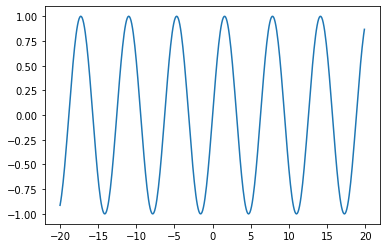

In [49]:
x=np.arange(-20,20,0.1)
y=np.sin(x)
plt.plot(x,y)